In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import sqlite3
import pandas as pd

#Connecting to the SQLite Database
connection = sqlite3.connect('amazon_data.db')
cursor = connection.cursor()

#Printing the available tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

cursor.execute("SELECT * FROM purchases_and_survey;") 
rows = cursor.fetchall()
df = pd.DataFrame(rows)

connection.close()


[('amazon_purchases',), ('amazon_survey',), ('purchases_and_survey',)]


In [6]:
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

In [16]:
df[['Order Date', 'Purchase Price Per Unit', 'Quantity', 'Survey ResponseID', 'Q-demos-age']].isnull().sum()

0
Order Date                 0
Purchase Price Per Unit    0
Quantity                   0
Survey ResponseID          0
Survey ResponseID          0
Q-demos-age                0
dtype: int64

In [10]:
df_sorted = df.sort_values(by='Purchase Price Per Unit', ascending=False)
df_sorted.head(10)

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Survey ResponseID,Q-demos-age,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
1201636,2020-02-16,6398.95,1,CA,LaCie 12big Thunderbolt 3 96TB STFJ96000400,B01MQCQLGT,COMPUTER_DRIVE_OR_STORAGE,R_3e8qukcDiaT0D0g,R_3e8qukcDiaT0D0g,65 and older,...,No,No,No,No,,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,No,Yes
190207,2022-08-04,5949.0,1,OR,Sony VW325ES 4K HDR Home Theater Projector VPL...,B091G9Y6K2,VIDEO_PROJECTOR,R_1NgAUlbpH2mgLYQ,R_1NgAUlbpH2mgLYQ,25 - 34 years,...,No,No,No,No,,Yes if I get part of the profit,No,I don't know,No,Yes
1366289,2021-04-27,5499.99,1,IL,,B08LLGKBGK,,R_3s6ANl73k2a38Oz,R_3s6ANl73k2a38Oz,25 - 34 years,...,No,Yes,No,No,Moved place of residence,No,Yes if consumers get part of the profit,Yes,I don't know,Yes
1154310,2022-06-16,4999.0,1,MA,Facial Beauty Bed Medical Aesthetic Tattoo Pro...,B08KR31QP5,BEAUTY,R_3PUi8o2if0JqKfl,R_3PUi8o2if0JqKfl,45 - 54 years,...,No,No,No,No,,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,I don't know,Yes
185191,2022-05-16,4299.0,1,MA,,B07NF8Z912,,R_1NDq0rxoUSu6oyz,R_1NDq0rxoUSu6oyz,35 - 44 years,...,No,No,No,No,,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,Yes,Yes
1201623,2019-12-10,3798.95,1,CA,Lacie 60TB 6big 6-Bay Thunderbolt 3 RAID Array...,B01MD1K8ZO,COMPUTER_DRIVE_OR_STORAGE,R_3e8qukcDiaT0D0g,R_3e8qukcDiaT0D0g,65 and older,...,No,No,No,No,,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,No,Yes
43141,2022-03-04,3704.11,1,,Corsair ONE i200 Compact Gaming PC - Intel® Co...,B09DK1WSMY,PERSONAL_COMPUTER,R_12bTyDTgHUIoMUQ,R_12bTyDTgHUIoMUQ,18 - 24 years,...,No,No,No,No,,Yes if I get part of the profit,Yes if consumers get part of the profit,No,I don't know,I don't know
390097,2022-01-03,3599.99,1,MI,"Prometheus XVII (2021) 17.3"" RTX 3080 Gaming L...",B09HZ9282W,NOTEBOOK_COMPUTER,R_1q7GuBNrrAGdxx3,R_1q7GuBNrrAGdxx3,35 - 44 years,...,Prefer not to say,Yes,No,No,,No,No,Yes,I don't know,Yes
1366228,2020-10-02,3579.0,1,IL,,B086PC5ZK5,,R_3s6ANl73k2a38Oz,R_3s6ANl73k2a38Oz,25 - 34 years,...,No,Yes,No,No,Moved place of residence,No,Yes if consumers get part of the profit,Yes,I don't know,Yes
1800657,2022-10-26,3499.99,1,VA,ASUS ROG Strix Scar 17 SE (2022) Gaming Laptop...,B09YN75CBF,NOTEBOOK_COMPUTER,R_vVVUPy624m5ZRx7,R_vVVUPy624m5ZRx7,35 - 44 years,...,No,No,No,No,,No,No,No,No,No


In [18]:
df_sorted = df.sort_values(by='Quantity', ascending=False)
df_sorted.head(10)

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Survey ResponseID,Q-demos-age,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
1705642,2022-03-14,0.15,339,AZ,Photo Prints – Glossy – Standard Size (4x6),B0711H8L7V,WALL_ART,R_dhbVD5HuTHco9Jn,R_dhbVD5HuTHco9Jn,25 - 34 years,...,No,Yes,No,No,Moved place of residence,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,Yes,Yes
1290071,2021-04-02,0.15,259,TX,Photo Prints – Glossy – Standard Size (4x5.3),B079NF2NFW,WALL_ART,R_3mknIzzCIrBk3h8,R_3mknIzzCIrBk3h8,45 - 54 years,...,Yes,Yes,Yes,No,,No,Yes if consumers get part of the profit,No,No,Yes
1705353,2020-07-09,0.12,253,MS,Photo Prints – Glossy – Standard Size (4x5.3),B079NF2NFW,WALL_ART,R_dhbVD5HuTHco9Jn,R_dhbVD5HuTHco9Jn,25 - 34 years,...,No,Yes,No,No,Moved place of residence,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,Yes,Yes
333327,2019-10-18,0.12,219,MO,Photo Prints – Glossy – Standard Size (4x5.3),B079NF2NFW,WALL_ART,R_1lxYa2W6GgcAQ19,R_1lxYa2W6GgcAQ19,35 - 44 years,...,Yes,No,No,No,,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,I don't know,I don't know
1542290,2019-12-05,0.12,204,NY,Photo Prints – Glossy – Standard Size (4x5.3),B079NF2NFW,WALL_ART,R_Q6WPHvxgbOBjvZ7,R_Q6WPHvxgbOBjvZ7,45 - 54 years,...,No,No,No,No,,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,I don't know,Yes
1705354,2020-07-09,0.12,185,MS,Photo Prints – Glossy – Standard Size (4x6),B0711H8L7V,WALL_ART,R_dhbVD5HuTHco9Jn,R_dhbVD5HuTHco9Jn,25 - 34 years,...,No,Yes,No,No,Moved place of residence,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,Yes,Yes
1412971,2020-06-09,0.12,176,OR,Photo Prints – Glossy – Standard Size (4x6),B0711H8L7V,WALL_ART,R_6XahSu4kiQeN2xz,R_6XahSu4kiQeN2xz,35 - 44 years,...,No,I stopped in the recent past,No,No,,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,I don't know,Yes
1800019,2022-12-09,0.17,115,UT,Photo Prints – Glossy – Standard Size (4x6),B0711H8L7V,WALL_ART,R_vTgJcqkP3auCuGJ,R_vTgJcqkP3auCuGJ,35 - 44 years,...,No,No,No,No,Had a child,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,Yes,Yes
1057505,2021-07-31,0.15,113,LA,Photo Prints – Glossy – Standard Size (4x6),B0711H8L7V,WALL_ART,R_3HRFZL1JSj3MxJu,R_3HRFZL1JSj3MxJu,35 - 44 years,...,No,No,No,No,,No,No,No,Yes,Yes
1057516,2022-09-05,0.17,106,LA,Photo Prints – Matte – Standard Size (4x5.3),B079NGFNJP,WALL_ART,R_3HRFZL1JSj3MxJu,R_3HRFZL1JSj3MxJu,35 - 44 years,...,No,No,No,No,,No,No,No,Yes,Yes


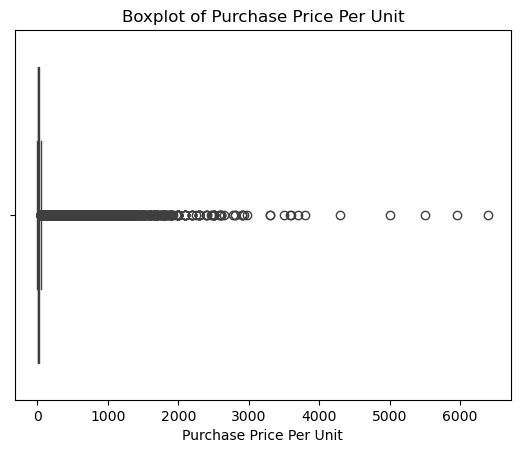

In [14]:
# Boxplot for Purchase Price Per Unit
sns.boxplot(x=df['Purchase Price Per Unit'])
plt.title('Boxplot of Purchase Price Per Unit')
plt.show()